##Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Initial Analisis

In [3]:
# Reading and slight cleaning of data
df = pd.read_csv("Sunspots.csv")
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})
df.drop(columns = 'Unnamed: 0',inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3265 non-null   object 
 1   SunspotNumber  3265 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


#For better time series manipulation, let's convert the ‘Date’ column to datetime format and change its order

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
year = df['Date'].dt.year
month = df['Date'].dt.month
day=df['Date'].dt.day
date=df['Date'].dt.date

print(df.columns)






Index(['Date', 'SunspotNumber'], dtype='object')


#Set the 'Date' column as the index of the DataFrame


In [5]:
df = df.set_index("Date")
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SunspotNumber  3265 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB


#Summary statistics

In [6]:
df.describe()

,SunspotNumber
count,3265.000000
mean,81.778775
std,67.889277
min,0.000000
25%,23.900000
50%,67.200000
75%,122.500000
max,398.200000


Time indices are already sorted from past to present in an ascending order, and none of the values in the 'Monthly Mean Total Sunspot Number' column are null

In [7]:
print(df.index.is_monotonic_increasing)
df.isnull().sum()


True


SunspotNumber    0
dtype: int64

##Exploratory Data Analysis

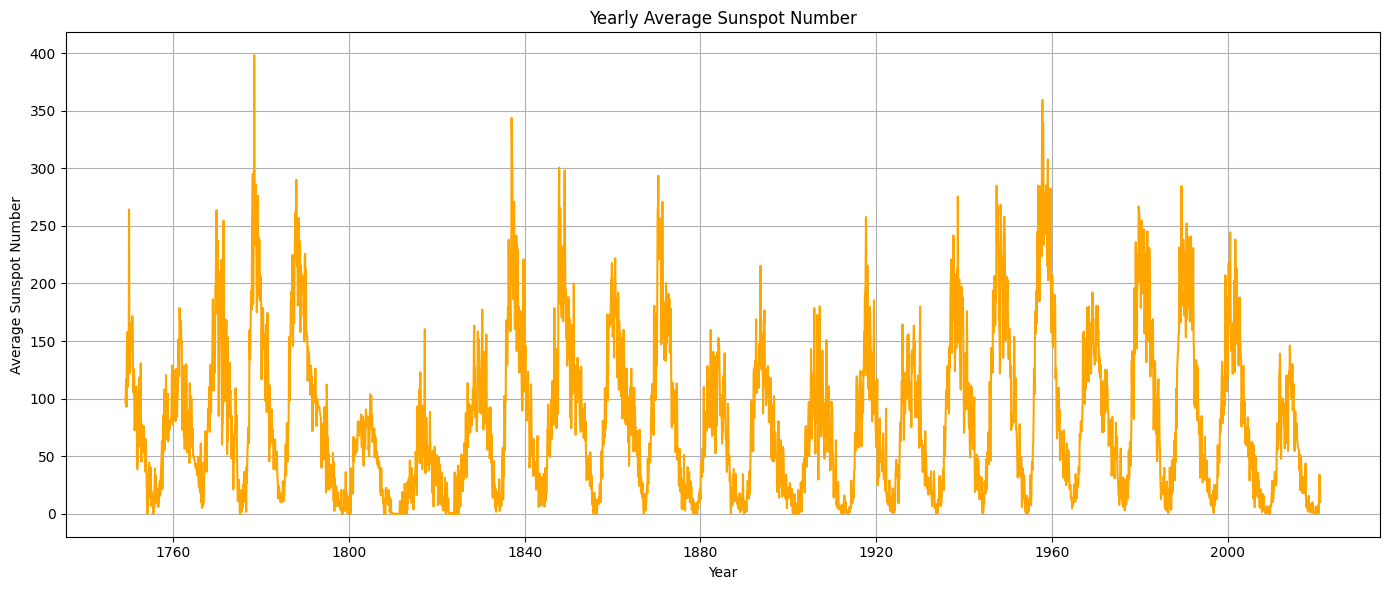

In [8]:

yearly_avg = df.groupby("Date")["SunspotNumber"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_avg, x="Date", y="SunspotNumber", color="orange")
plt.title("Yearly Average Sunspot Number")
plt.xlabel("Year")
plt.ylabel("Average Sunspot Number")
plt.grid(True)
plt.tight_layout()
plt.show()



#shows the average sunspot averages for the months

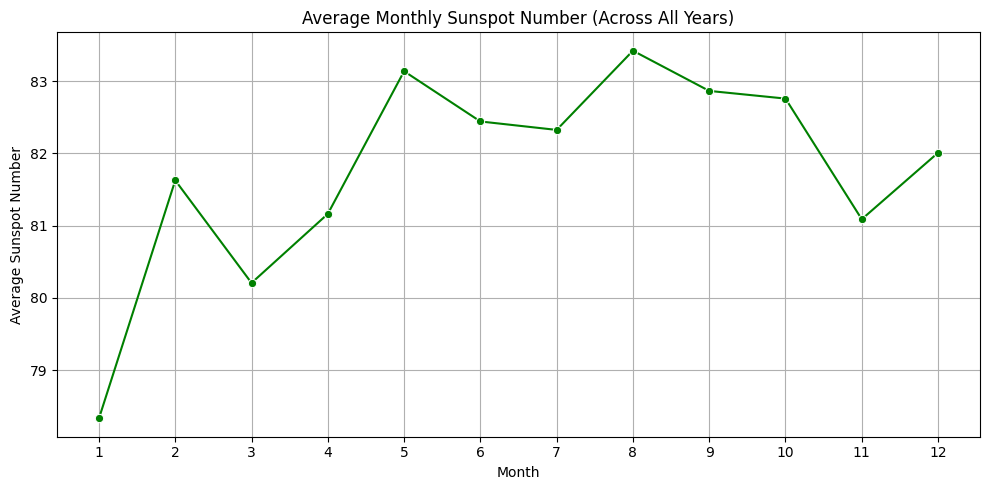

In [9]:
monthly_avg = df.groupby(df.index.month)["SunspotNumber"].mean().reset_index()
monthly_avg.rename(columns={'Date': 'Month', 'index': 'Month'}, inplace=True)  # ensure column is named 'Month'

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x="Month", y="SunspotNumber", marker='o', color="green")
plt.title("Average Monthly Sunspot Number (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Sunspot Number")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
#sns.set_theme(style="ticks", palette="pastel")
#plt.figure(figsize=(15,5))

#sns.boxplot(x="Month", y="SunspotNumber",
            #data=monthly_avg, color='blue')
#sns.despine(offset=10, trim=True)
#plt.xlabel('Month')
#plt.ylabel('Average Sunspot Number (Monthly)')

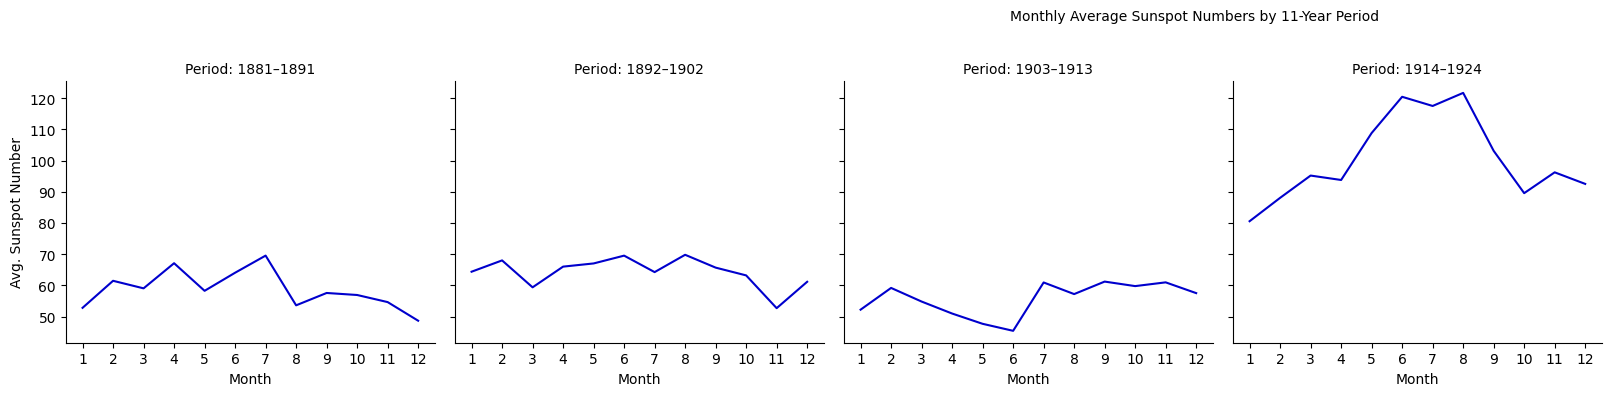

In [11]:

# Focus on data from 1880 to 1920
df_recent = df[(df.index.year > 1880) & (df.index.year < 1920)].copy()
df_recent['Year'] = df_recent.index.year
df_recent['Month'] = df_recent.index.month

# Create 11-year period labels (e.g., 1881, 1892, 1903)
df_recent['Period'] = (df_recent['Year'] // 11) * 11

# Calculate average sunspot number per month for each 11-year period
df_grouped = df_recent.groupby(['Period', 'Month'])['SunspotNumber'].mean().reset_index()

# Plot using Seaborn FacetGrid
g = sns.FacetGrid(df_grouped, col="Period", col_wrap=6, height=4, aspect=1)
g.map(sns.lineplot, "Month", "SunspotNumber", color="mediumblue")
g.set_axis_labels("Month", "Avg. Sunspot Number")
g.set(xticks=range(1, 13))
g.set_titles(col_template="{col_name}")
# Customize facet titles to show "Period: 1881–1891", etc.
for ax, period in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Period: {int(period)}–{int(period)+10}", fontsize=10)

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Monthly Average Sunspot Numbers by 11-Year Period", fontsize=10)
plt.show()

#Shows the monthly sunspot average for the last twenty years

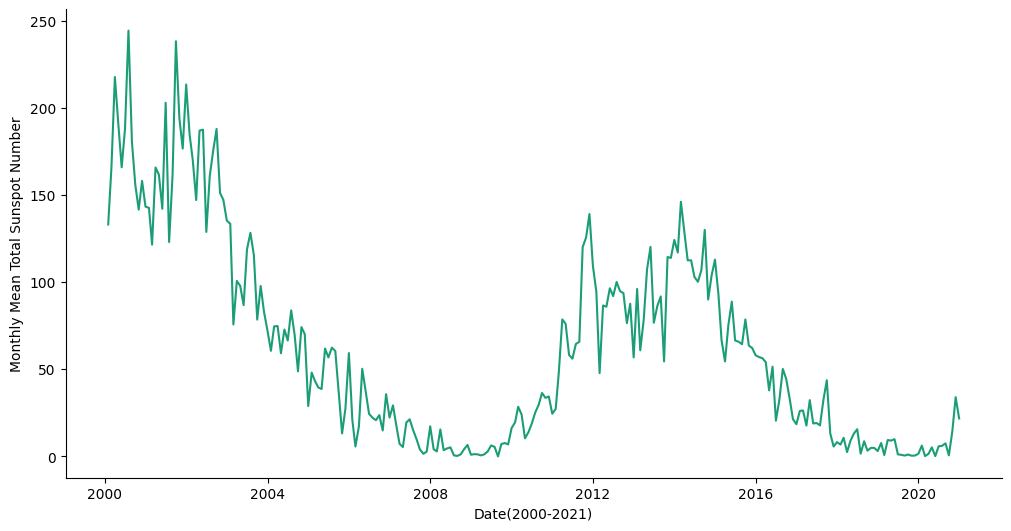

In [12]:
# Select data from year 2000 onwards using the index (which is datetime)
new_df = df.loc[(df.index.year >1999 )&(df.index.year <2021 )].copy()
new_df = new_df.reset_index()  # bring 'Date' back as a column for plotting
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys = series['SunspotNumber']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date(2000-2021)')
_ = plt.ylabel('Monthly Mean Total Sunspot Number')

In [13]:
#from matplotlib import pyplot as plt
#new_df['SunspotNumber'].plot(kind='hist', bins=5, title='Sunspot Number')
#plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

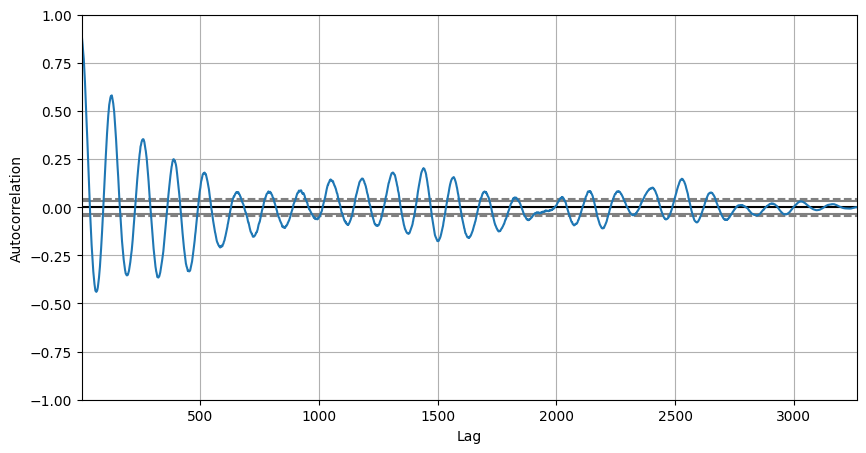

In [14]:
plt.figure(figsize = (10,5))
pd.plotting.autocorrelation_plot(df)

#

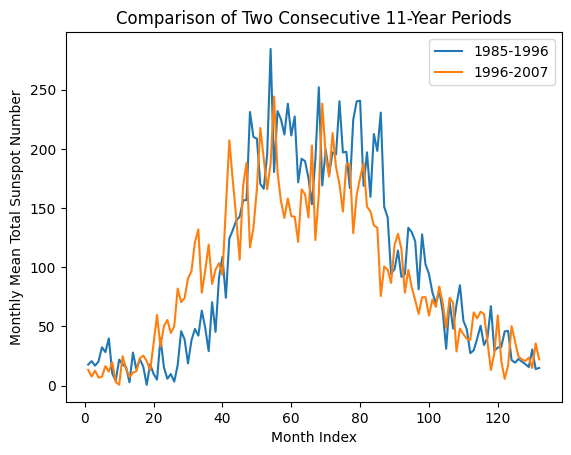

In [15]:
df_11_1985 = df[(df.index.year >= 1985) & (df.index.year < 1996)]
df_11_1996 = df[(df.index.year >= 1996) & (df.index.year < 2007)]

x_1985 = np.arange(1, len(df_11_1985) + 1)
x_1996 = np.arange(1, len(df_11_1996) + 1)

plt.plot(x_1985, df_11_1985['SunspotNumber'], label='1985-1996')
plt.plot(x_1996, df_11_1996['SunspotNumber'], label='1996-2007')
plt.legend()
plt.xlabel('Month Index')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of Two Consecutive 11-Year Periods')
plt.show()

C:\Users\Monster\AppData\Local\Temp\ipykernel_22056\2776847102.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_groups = ser.groupby(pd.Grouper(freq='Y'))
C:\Users\Monster\AppData\Local\Temp\ipykernel_22056\2776847102.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_years[year.year] = group.values
C:\Users\Monster\AppData\Local\Temp\ipykernel_22056\2776847102.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_years[year.year] = group.values
C:\Users\Monst

<Axes: >

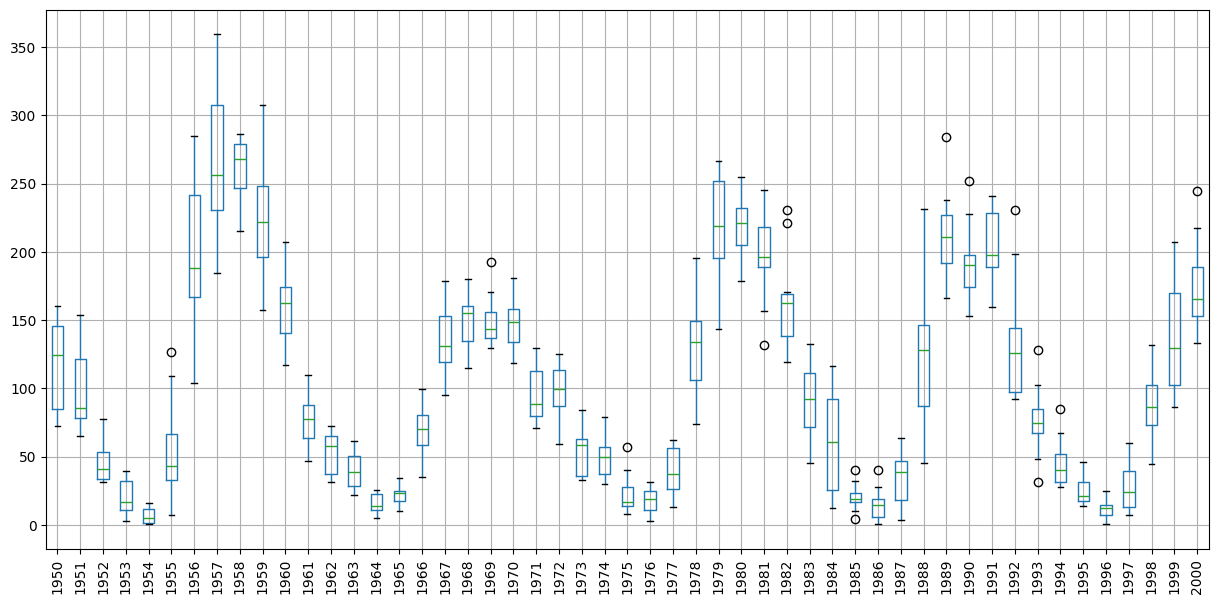

In [16]:
# squeeze the original dataframe into a series
ser = pd.Series(df['SunspotNumber'].values,index = df.index)
# to prevent possible errors, drop the last row in the series because 2021 has no data for months other than Jan
ser = ser.drop(pd.to_datetime('2021-01-31'))
# year_groups is the original data grouped by year
year_groups = ser.groupby(pd.Grouper(freq='Y'))
df_years = pd.DataFrame()

for year, group in year_groups:
    df_years[year.year] = group.values
# df_years is a dataframe with a column for each year in the data, and a row for every month within that year
# boxplots for sunspot data between the years 1950 and 2000
df_years.loc[:,1950:2000].boxplot(figsize = (15,7), rot = 90)

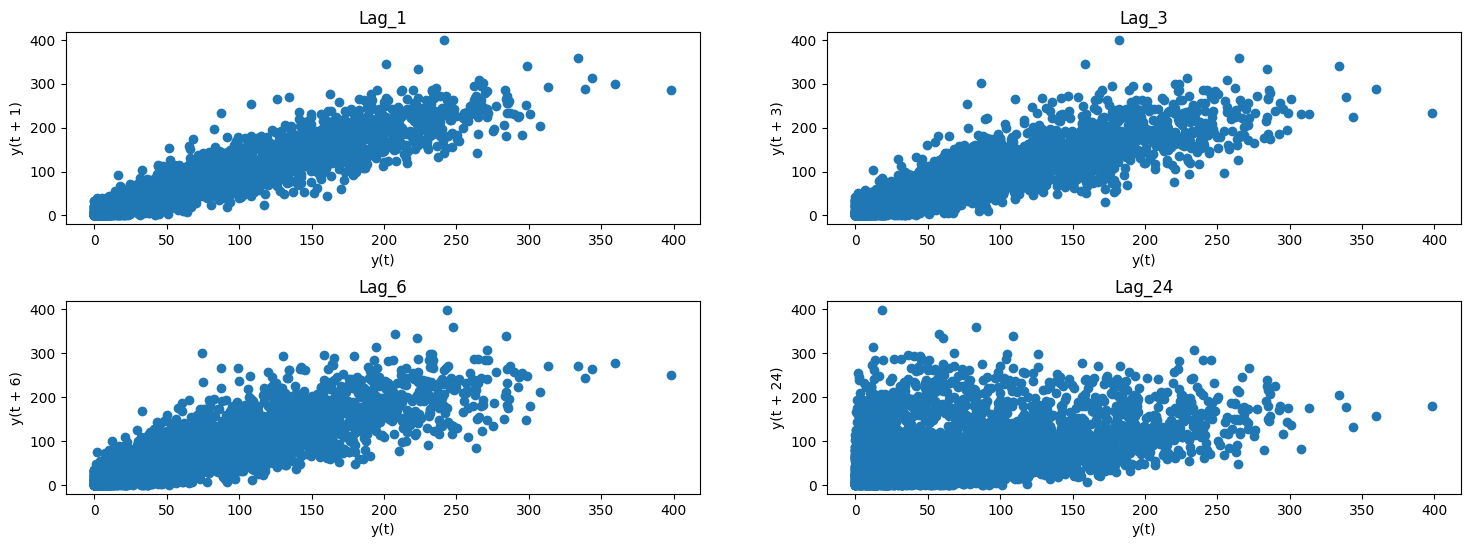

In [17]:
fig = plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

ax1 = fig.add_subplot(2,2,1)
pd.plotting.lag_plot(df['SunspotNumber'], lag=1)
plt.title('Lag_1')

ax2 = fig.add_subplot(2,2,2)
pd.plotting.lag_plot(df['SunspotNumber'], lag=3)
plt.title('Lag_3')

ax3 = fig.add_subplot(2,2,3)
pd.plotting.lag_plot(df['SunspotNumber'], lag=6)
plt.title('Lag_6')

ax3 = fig.add_subplot(2,2,4)
pd.plotting.lag_plot(df['SunspotNumber'], lag=24)
plt.title('Lag_24')

plt.show()

In [18]:
# Ensure required packages are installed
%pip install statsmodels

from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy._lib._util import _lazywhere

anova_df = pd.DataFrame({'Month': month, 'SunspotNumber': df['SunspotNumber']}).dropna()
anova_result = ols('SunspotNumber ~ C(Month)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print("1. ANOVA p-değeri:", anova_table["PR(>F)"][0])

Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (c:\Users\Monster\Desktop\Python\.venv\Lib\site-packages\scipy\_lib\_util.py)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Filter rows where SunspotNumber is 0
zero_sunspots = df[df['Monthly Mean Total Sunspot Number'] == 0]

# Print the dates
print(zero_sunspots.index.tolist())

[Timestamp('1754-01-31 00:00:00'), Timestamp('1755-05-31 00:00:00'), Timestamp('1755-06-30 00:00:00'), Timestamp('1775-02-28 00:00:00'), Timestamp('1798-05-31 00:00:00'), Timestamp('1798-06-30 00:00:00'), Timestamp('1798-07-31 00:00:00'), Timestamp('1799-08-31 00:00:00'), Timestamp('1799-09-30 00:00:00'), Timestamp('1800-04-30 00:00:00'), Timestamp('1807-12-31 00:00:00'), Timestamp('1808-01-31 00:00:00'), Timestamp('1808-03-31 00:00:00'), Timestamp('1809-10-31 00:00:00'), Timestamp('1809-11-30 00:00:00'), Timestamp('1809-12-31 00:00:00'), Timestamp('1810-01-31 00:00:00'), Timestamp('1810-02-28 00:00:00'), Timestamp('1810-03-31 00:00:00'), Timestamp('1810-04-30 00:00:00'), Timestamp('1810-05-31 00:00:00'), Timestamp('1810-06-30 00:00:00'), Timestamp('1810-07-31 00:00:00'), Timestamp('1810-08-31 00:00:00'), Timestamp('1810-09-30 00:00:00'), Timestamp('1810-10-31 00:00:00'), Timestamp('1810-11-30 00:00:00'), Timestamp('1810-12-31 00:00:00'), Timestamp('1811-01-31 00:00:00'), Timestamp('18

Chi-Square Test Stat: 0.28, p-value: 1.0000


C:\Users\Monster\AppData\Local\Temp\ipykernel_21824\2429547854.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_means.index, y=monthly_means.values, palette='Blues_d')


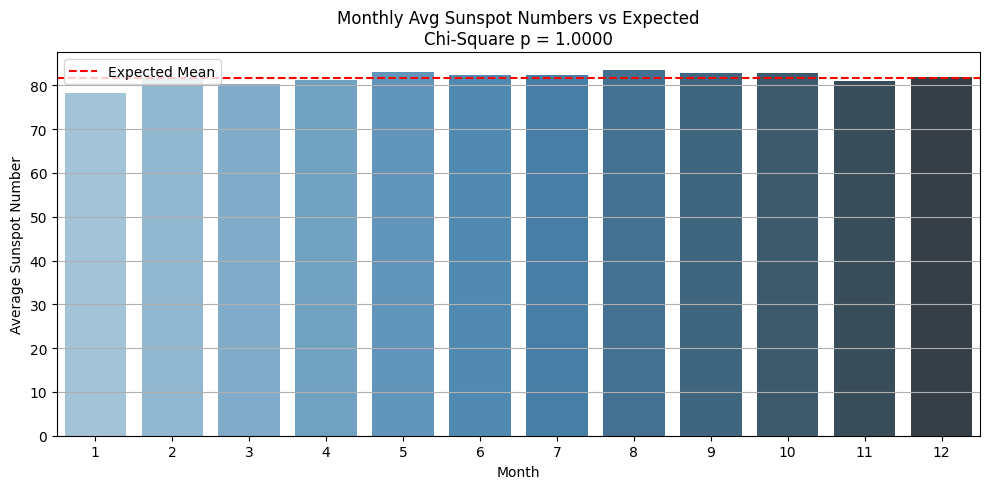

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Veri yükleme
df = pd.read_csv("Sunspots.csv")
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Aylık ortalama güneş lekesi sayıları
monthly_means = df.groupby('Month')['SunspotNumber'].mean()

# Beklenen değer: tüm aylar eşit ortalamaya sahipmiş gibi varsayılır
expected = [monthly_means.mean()] * 12

# Chi-Square testi
chisq_stat, chisq_p = stats.chisquare(f_obs=monthly_means, f_exp=expected)
print(f"Chi-Square Test Stat: {chisq_stat:.2f}, p-value: {chisq_p:.4f}")

# Görselleştirme
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_means.index, y=monthly_means.values, palette='Blues_d')
plt.axhline(monthly_means.mean(), color='red', linestyle='--', label='Expected Mean')
plt.title(f"Monthly Avg Sunspot Numbers vs Expected\nChi-Square p = {chisq_p:.4f}")
plt.xlabel("Month")
plt.ylabel("Average Sunspot Number")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA: Aylar arasında fark var mı?
anova_df = df[['Month', 'SunspotNumber']].dropna()
model = ols('SunspotNumber ~ C(Month)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (c:\Users\Monster\Desktop\Python\.venv\Lib\site-packages\scipy\_lib\_util.py)

C:\Users\Monster\AppData\Local\Temp\ipykernel_21824\122983197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='SunspotNumber', data=monthly_avg, palette='coolwarm')


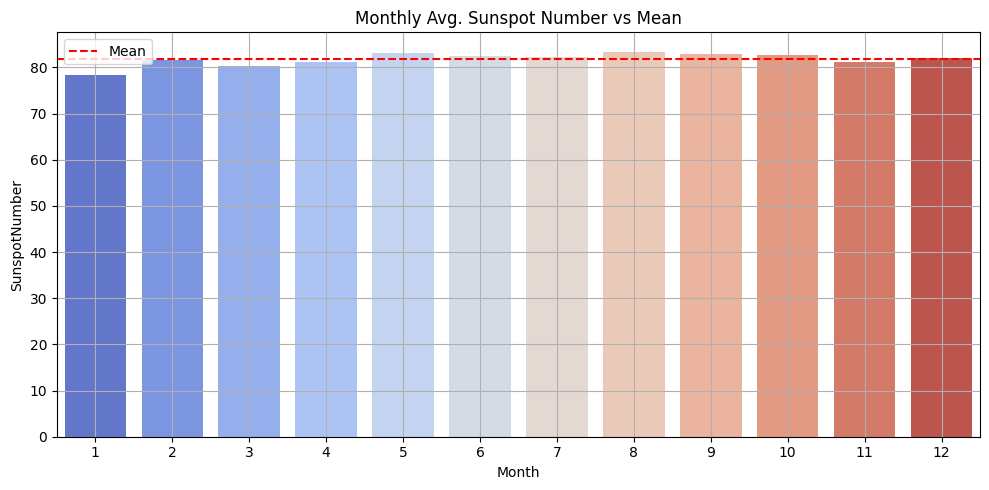

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_avg = df.groupby('Month')['SunspotNumber'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='SunspotNumber', data=monthly_avg, palette='coolwarm')
plt.axhline(monthly_avg['SunspotNumber'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Monthly Avg. Sunspot Number vs Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

df_85_96 = df[(df.index.year >= 2009) & (df.index.year <= 2020)]['SunspotNumber'].dropna()
df_96_07 = df[(df.index.year >=2008 ) & (df.index.year <= 2019)]['SunspotNumber'].dropna()

ttest_stat, ttest_p = ttest_ind(df_85_96, df_96_07, equal_var=False)
print(f"T-Test Stat: {ttest_stat:.3f}, p-value: {ttest_p:.4f}")

T-Test Stat: 0.076, p-value: 0.9391


In [ ]:
group1 = df[(df.index.year >= 2009) & (df.index.year <= 2020)]['SunspotNumber'].dropna()
group2 = df[(df.index.year >= 2008) & (df.index.year <= 2019)]['SunspotNumber'].dropna()

stat, p = stats.ttest_ind(group1, group2, equal_var=False)
print(f"T-Test p-değeri: {p:.4f}")
if p < 0.05:
    print("Sonuç: Dönemler arasında fark var.")
else:
    print("Sonuç: Dönemler arasında fark yok.")

T-Test p-değeri: 0.9391
Sonuç: Dönemler arasında fark yok.


In [ ]:
group1 = df[(df.index.year >= 1970) & (df.index.year <= 1996)]['SunspotNumber'].dropna()
group2 = df[(df.index.year >= 1996) & (df.index.year <= 2020)]['SunspotNumber'].dropna()

stat, p = stats.ttest_ind(group1, group2, equal_var=False)
print(f"T-Test p-değeri: {p:.4f}")
if p < 0.05:
    print("Sonuç: Dönemler arasında fark var.")
else:
    print("Sonuç: Dönemler arasında fark yok.")

T-Test p-değeri: 0.0000
Sonuç: Dönemler arasında fark var.


Poisson Mean: 41.01, Variance: 893.08
conformity to the Poisson distribution: False


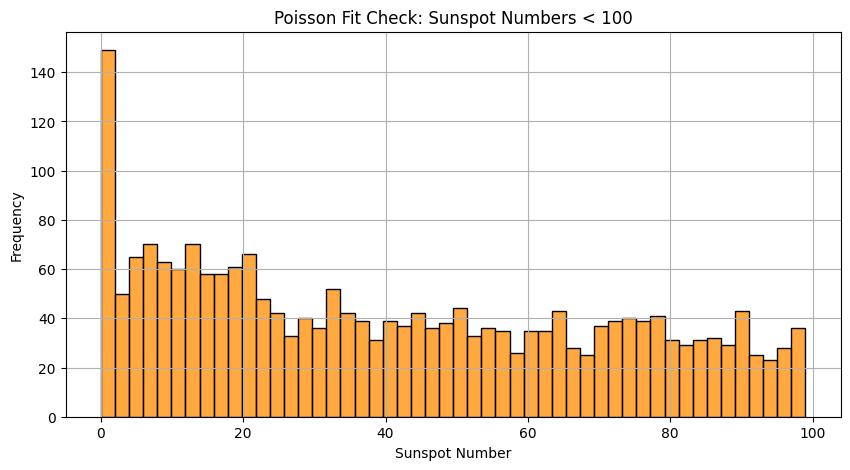

In [ ]:

poisson_data = df[df['SunspotNumber'] < 100]['SunspotNumber'].dropna().astype(int)
poisson_mean = poisson_data.mean()
poisson_var = poisson_data.var()
print(f"Poisson Mean: {poisson_mean:.2f}, Variance: {poisson_var:.2f}")
print("conformity to the Poisson distribution:", np.isclose(poisson_mean, poisson_var, rtol=0.2))
filtered = df[df['SunspotNumber'] < 100]['SunspotNumber'].dropna().astype(int)

plt.figure(figsize=(10, 5))
sns.histplot(filtered, bins=50, kde=False, color="darkorange")
plt.title("Poisson Fit Check: Sunspot Numbers < 100")
plt.xlabel("Sunspot Number")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Shapiro-Wilk Stat: 0.894, p-value: 0.0000


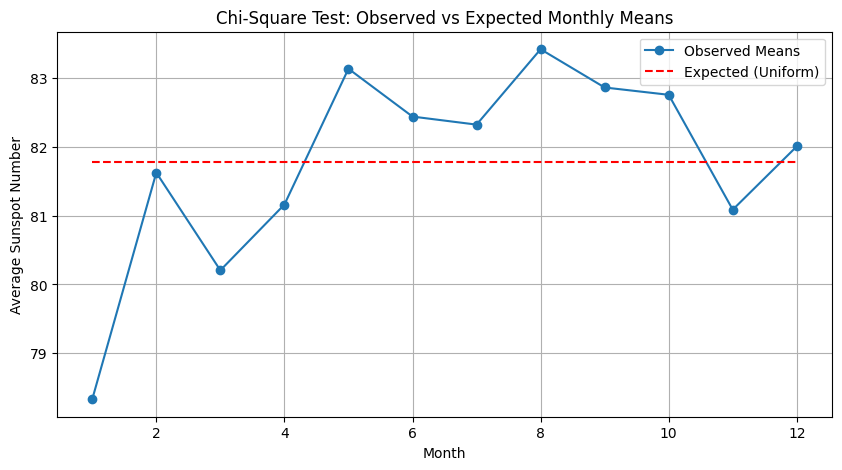

In [ ]:
from scipy.stats import shapiro

# 2000–2020 arası veri
sw_df = df[(df.index.year >= 2000) & (df.index.year <= 2020)]['SunspotNumber'].dropna()
shapiro_stat, shapiro_p = shapiro(sw_df.sample(n=len(sw_df), random_state=42))
print(f"Shapiro-Wilk Stat: {shapiro_stat:.3f}, p-value: {shapiro_p:.4f}")
monthly_means = df.groupby(df.index.month)['SunspotNumber'].mean()
expected = [monthly_means.mean()] * 12

plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), monthly_means, marker='o', label='Observed Means')
plt.plot(range(1, 13), expected, '--', color='red', label='Expected (Uniform)')
plt.title("Chi-Square Test: Observed vs Expected Monthly Means")
plt.xlabel("Month")
plt.ylabel("Average Sunspot Number")
plt.legend()
plt.grid(True)
plt.show()

Pearson Corr: 0.036, p-value: 0.0391


C:\Users\Monster\AppData\Local\Temp\ipykernel_21824\1374649134.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sample = df['SunspotNumber'].resample('M').mean()


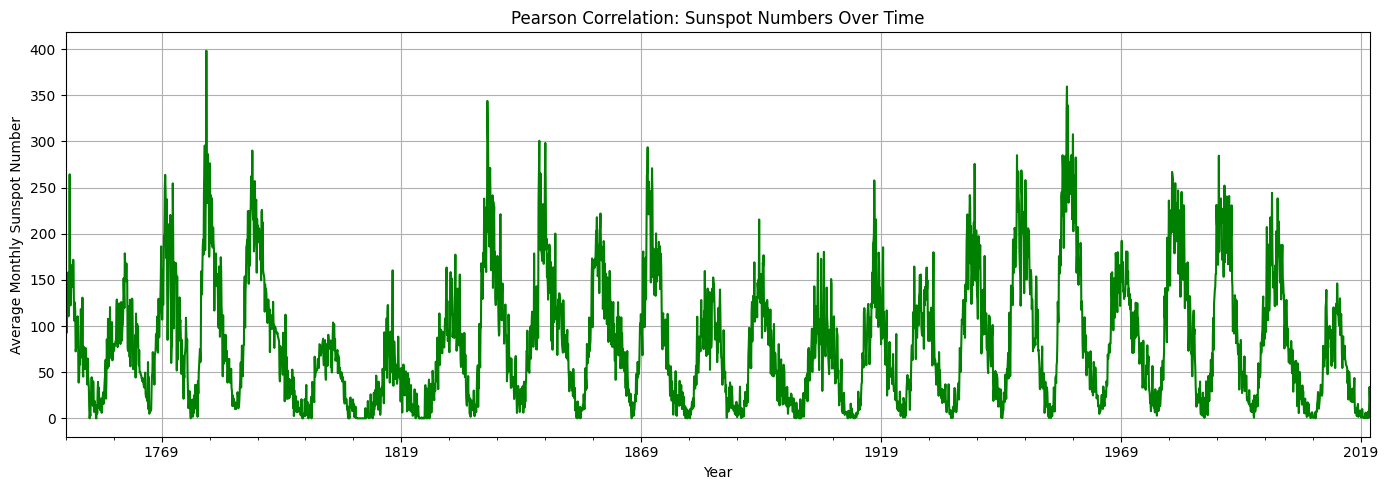

In [ ]:
from scipy.stats import pearsonr
df_corr = df[['SunspotNumber']].dropna().copy()
df_corr['Timestamp'] = df_corr.index.astype(np.int64) // 10**9

corr_coef, corr_p = pearsonr(df_corr['Timestamp'], df_corr['SunspotNumber'])
print(f"Pearson Corr: {corr_coef:.3f}, p-value: {corr_p:.4f}")
plt.figure(figsize=(14, 5))
df_sample = df['SunspotNumber'].resample('M').mean()
df_sample.plot(color='green')
plt.title("Pearson Correlation: Sunspot Numbers Over Time")
plt.xlabel("Year")
plt.ylabel("Average Monthly Sunspot Number")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro


data = df[(df.index.year >= 1980) & (df.index.year <= 2020)]['SunspotNumber'].dropna()
n = min(500, len(data))
sample = data.sample(n)
stat, p = shapiro(sample)
print(f"Shapiro-Wilk p-değeri: {p:.4f}")
if p < 0.05:
    print("Data not normally distributed.")
else:
    print("Data is normally distributed.")

Shapiro-Wilk p-değeri: 0.0000
Data not normally distributed.


In [ ]:
from scipy.stats import shapiro

sw_df = df[(df.index.year >= 1980) & (df.index.year <=1981 )]['SunspotNumber'].dropna()
n = min(500, len(sw_df))
sample = sw_df.sample(n, random_state=42)
stat, p = shapiro(sample)
print(f"Shapiro-Wilk p-value: {p:.4f}")
if p < 0.05:
    print("Conclusion: The data is not normally distributed.")
else:
    print("Conclusion: The data is normally distributed.")

Shapiro-Wilk p-value: 0.3501
Conclusion: The data is normally distributed.


In [ ]:
# Son 20 yılı filtrele (2005–2024)
df_20yrs = df[(df.index.year >= 2005) & (df.index.year <= 2024)].dropna()

# Tarihleri sayısal forma (timestamp) çevir
df_20yrs['Timestamp'] = df_20yrs.index.astype(np.int64) // 10**9  # Unix timestamp

# Pearson korelasyonunu hesapla
corr, p_value = pearsonr(df_20yrs['Timestamp'], df_20yrs['SunspotNumber'])

# Sonuçları yazdır
print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant correlation between time and sunspot number.")
else:
    print("Conclusion: No significant correlation between time and sunspot number.")

Pearson Correlation Coefficient: -0.0329
P-value: 0.6500
Conclusion: No significant correlation between time and sunspot number.


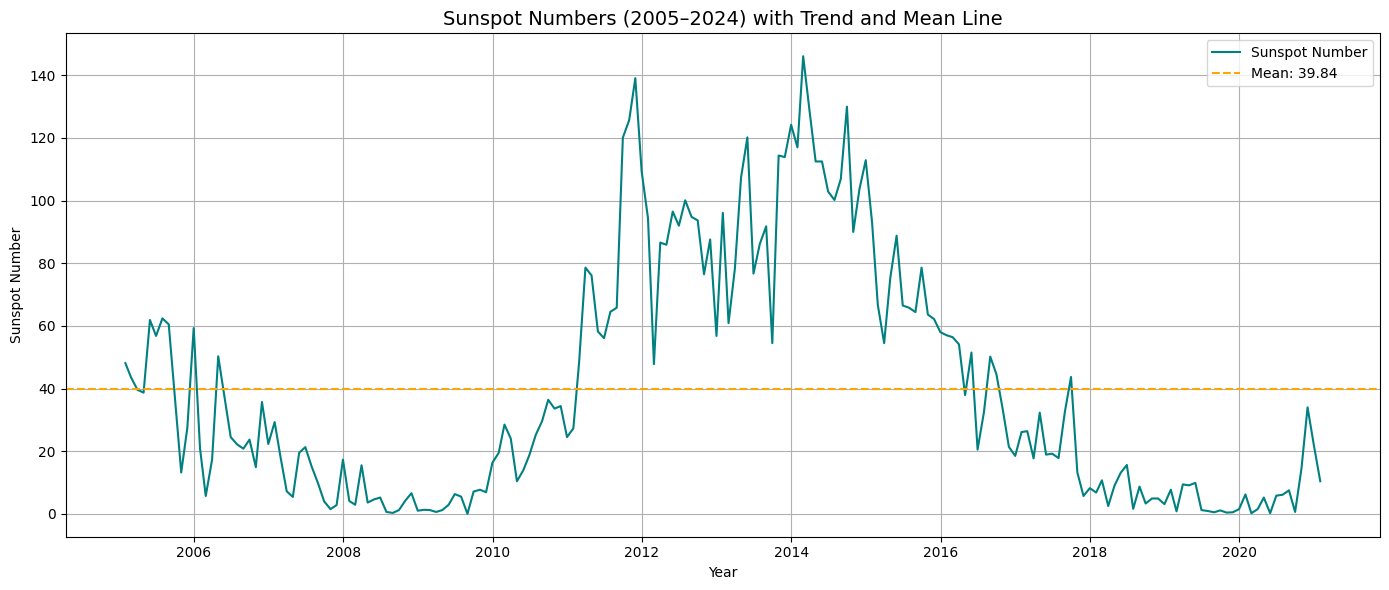

In [ ]:
df_20yrs = df[(df.index.year >= 2005) & (df.index.year <= 2024)][['SunspotNumber']].dropna()


df_20yrs['OrdinalDate'] = df_20yrs.index.map(pd.Timestamp.toordinal)
z = np.polyfit(df_20yrs['OrdinalDate'], df_20yrs['SunspotNumber'], 1)
p = np.poly1d(z)


mean_value = df_20yrs['SunspotNumber'].mean()


plt.figure(figsize=(14, 6))
sns.lineplot(x=df_20yrs.index, y=df_20yrs['SunspotNumber'], label="Sunspot Number", color="teal")
plt.axhline(y=mean_value, color='orange', linestyle='--', label=f"Mean: {mean_value:.2f}")
plt.title("Sunspot Numbers (2005–2024) with Trend and Mean Line", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_corr = df[['SunspotNumber']].dropna().copy()
df_corr['Timestamp'] = df_corr.index.astype(np.int64) // 10**9

corr, p = stats.pearsonr(df_corr['Timestamp'], df_corr['SunspotNumber'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p:.4f}")
if p < 0.05:
    print("Conclusion: There is a significant correlation with time.")
else:
    print("Conclusion: No significant correlation with time.")

NameError: name 'df' is not defined

In [19]:
from scipy.stats import shapiro

# Sadece sayısal değerler içeren sütunu al
sunspots = df['SunspotNumber'].dropna()

# Shapiro-Wilk testi uygula
stat, p_value = shapiro(sunspots)

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Shapiro-Wilk Test Statistic: 0.9175
P-value: 0.0000
